<center>
    <h1 id='xgboosting' style='color:#7159c1'>🤖 XGBoosting 🤖</h1>
    <i></i>
</center>

XGBoost works in the following way:

- trains the first model (aka Naive Model);
- predicts the results;
- calculates the loss (such as MAE, MSE, MRE and so on);
- chooses a new model to train;
- adds the new model to the Naive one in order to get better
results;
- the cycle is repeated till the model reaches the learning
rate goal.

<h1 id='0-simple-boosting' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Simple Boosting</h1>

In [1]:
# ---- Imports ----
import pandas as pd # pip install pandas
from xgboost import XGBRegressor # pip install xgboost
from sklearn.metrics import mean_absolute_error # pip install sklearn
from sklearn.model_selection import train_test_split

autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242201
)

In [2]:
# ---- Creating XGBoost Model ----
#
# - Parameters:
#
# / n_estimators: how many times the cycle will be repeated.
# It's often between 100-1000 times. However, take care, because:
#    - Too low a value causes underfitting, which leads to inaccurate 
# redictions on both training data and test data.
#    - Too high a value causes overfitting, which causes accurate 
# predictions on training data, but inaccurate predictions on test 
# data (which is what we care about).
#
# / early_stopping_rounds: the model will stop running if it gets X
# cycles without improving the learning rate. It's often setted
# by 5.
# Also, when you use this parameter, you gotta assign the validation
# dataset to the model too with the EVAL_SET parameter
#
# / learning_rate: this parameter is multiplied to the predictions
# results in order to get more accurate results. As small the learning
# rate is and larger the n_estimators are, the better the predictions
# will be.
# In the other hand, how the learning_rate makes the model goes through
# the cycle more times, the model will take more time to process.
# The default leaning_rate is 0.1.
#
# / n_jobs: you assign the number of cores the CPU/GPU/TPU has
# in order to run the code in parallel
#
# / verbose: False >> turns off the train log. True (default) >>
# turns on
#
xgb_model_1 = XGBRegressor(
    n_estimators=500
    , learning_rate=0.05
    , n_jobs=4
    , early_stopping_rounds=5
    , random_state=2024221
)

xgb_model_1.fit(
    X_train, y_train
    , eval_set=[(X_valid, y_valid)]
    , verbose=False
)

# ---- Predictions ----
predictions_1 = xgb_model_1.predict(X_valid)
mae_1 = mean_absolute_error(predictions_1, y_valid)
print(f'- MAE: {mae_1}')

- MAE: 1381.8241345635777


<h1 id='1-advanced-boosting' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Advanced Boosting</h1>

This is a complement of XGBoost where I explain about some parameters that can be set up when creating the model and I show how to apply Cross-Validation with this technique.

In [3]:
# ---- Importings ----
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=00.70
    , test_size=0.30
    , random_state=20242201
)

In [4]:
# ---- Creating XGB Model using Some Parameters ----
#
# - objective: will XGB make predictions (reg:linear) or classifications
# (reg:logistic for only decision, binary:logistic for decision and probability)
# - colsample_bytree: percentage of features used by tree (high values lead to overfitting)
# - learning_rate: the learning rate measure!
# - max_depth: maximum level that a tree can grown during any boosting round
# - alpha: regularization on leaf weights (high values lead to high regularizations)
# - n_estimators: number of trees that'll be build
#
xgb_model_2 = XGBRegressor(
    objective='reg:squarederror'
    , colsample_bytree=0.30
    , learning_rate=0.10
    , max_depth=5
    , alpha=10
    , n_estimators=10
    , n_jobs=4
    , early_stopping_rounds=5 # optional
    , random_state=20242201
)

xgb_model_2.fit(
    X_train, y_train
    , eval_set=[(X_valid, y_valid)] # optional
    , verbose=False
)

predictions_2 = xgb_model_2.predict(X_valid)

In [8]:
# ---- Applying Cross-Validation (CV) ----
params = {
    'objective' : 'reg:squarederror'
    , 'colsample_bytree': 0.30
    , 'learning_rate' : 0.10
    , 'max_depth': 5
    , 'alpha': 10
    # , 'n_estimators': 10 # replaced by 'num_boost_round'
    , 'n_jobs': 4
    # , 'early_stopping_rounds': 5 # replaced by 'early_stopping_rounds'
    #, 'random_state': 20242201 # replaced by 'seed'
}

# Parameters:
#
# - dtrain: the whole dataset to be split into train and validation
# - params: the parameters to createe the model (set as a dictionary)
# - nfold: number of folds to create the train and validation datasets
# - num_boost_round: number of trees that will be build (it's like 'n_estimators')
# - early_stopping_rounds: number of rounds without improving the learning to stop the training phase
# - metrics: metrics to evaluate the model
# - as_pandas: True >> returns the results in Pandas DataFrame format
# - seed: it's like 'random_state' for reproducability
#
cv_results = xgb.cv(
    dtrain=xgb.DMatrix(X_train, y_train)
    , params=params
    , nfold=5
    , num_boost_round=10
    , early_stopping_rounds=5
    , metrics='rmse'
    , as_pandas=True
    , seed=20242201
)

print(f'- Last Validation RMSE Mean: {cv_results["test-rmse-mean"].tail(1)}')
print('---')
cv_results.head()

- Last Validation RMSE Mean: 9    6539.911566
Name: test-rmse-mean, dtype: float64
---


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14018.281618,397.043448,13912.332720,1681.828763
1,12788.429893,357.919190,12708.994222,1578.262194
2,11671.855719,319.018206,11614.501705,1482.788109
3,10659.345969,286.784287,10637.990206,1334.883862
4,9750.590516,255.440534,9780.589223,1267.409905


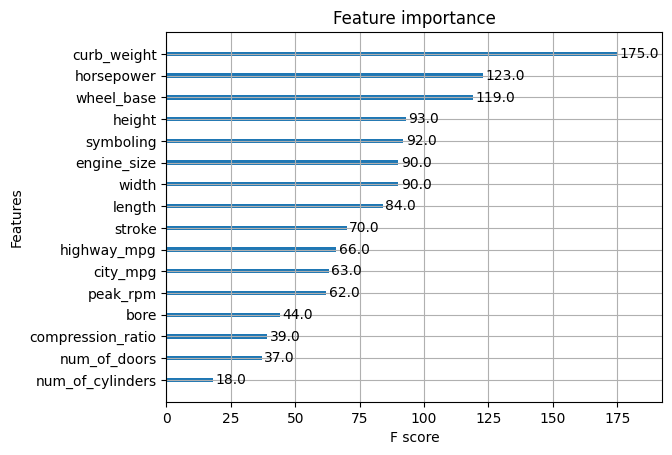

In [16]:
# ---- Evaluation ----
# Creating the model after Cross-Validation Step, plotting the
# first tree and Feature Importance plotting
X_dmatrix_train = xgb.DMatrix(X_train, y_train)
xgb_model_3 = xgb.train(
    params=params
    , num_boost_round=100
    , dtrain=X_dmatrix_train
)

# ---- Plotting Tree ----
#
# - it's needed to have 'Graphviz' installed
#
# xgb.plot_tree(xgb_model_3, num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

# ---- Feature Importance ----
xgb.plot_importance(xgb_model_3)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [18]:
# ---- Making Predictions ----
predictions = xgb_model_3.predict(xgb.DMatrix(data=X_valid, label=y_valid))

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).